In [1]:
library(dplyr)
library(tidyr)
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.2.2"
Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'purrr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr    

In [2]:
# set the working directory
setwd("C:/Users/user/OneDrive/Desktop/Masters/Semester 05 - MGT-6203-Data Analytics in Business/Project/Code")

In [3]:
#data file needs to be in the wd
df <- read.table(file = 'CTDC_synthetic_20210825.tsv', sep = '\t', header = TRUE)
head(df)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,⋯,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1
2,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1
3,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1
4,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1
5,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1
6,2015,Male,30--38,,13--24 (1-2 yrs),UKR,RUS,1,1,1,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,1


In [4]:
df <- df %>%
  mutate(index = row_number()) %>%
  mutate_all(~ifelse(. == "", NA, .)) %>%
  drop_na(yearOfRegistration) %>%
  mutate(index = row_number()) %>%
  filter(!is.na(gender)) %>%
  filter(!is.na(majorityStatusAtExploit)) %>%
  mutate(index = row_number()) %>%
  filter(gender == "Male" | gender == "Female") %>%
  mutate(isSexualExploit = ifelse(is.na(isSexualExploit), 0, isSexualExploit)) %>%
  mutate(isForcedLabour = ifelse(is.na(isForcedLabour), 0, isForcedLabour)) %>%
  mutate(recruiterRelationIntimatePartner = ifelse(is.na(recruiterRelationIntimatePartner), 0, recruiterRelationIntimatePartner)) %>%
  mutate(recruiterRelationFriend = ifelse(is.na(recruiterRelationFriend), 0, recruiterRelationFriend)) %>%
  mutate(recruiterRelationFamily = ifelse(is.na(recruiterRelationFamily), 0, recruiterRelationFamily))

head(df)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,⋯,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,index
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,1
2,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,2
3,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,3
4,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,4
5,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,5
6,2009,Female,24--26,Adult,0--12 (0-1 yr),UKR,RUS,1,1,1,⋯,NA,NA,NA,NA,NA,0,0,0,NA,6


`summarise()` has grouped output by 'citizenship'. You can override using the
`.groups` argument.


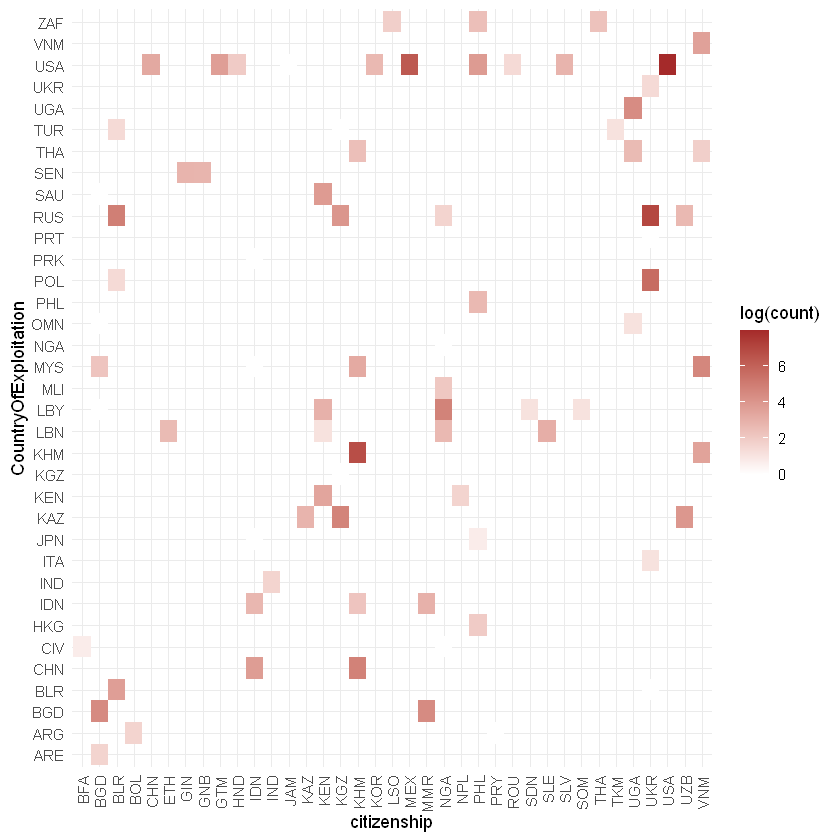

In [18]:
heatmap_data <- df %>%
  filter(!is.na(citizenship)) %>%
  filter(!is.na(CountryOfExploitation)) %>%
  group_by(citizenship, CountryOfExploitation) %>%
  summarise(count = n()) %>%
  ungroup()

ggplot(heatmap_data, aes(x = citizenship, y = CountryOfExploitation, fill = log(count))) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "brown") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [6]:
model1 <- glm(isSexualExploit ~ gender + majorityStatusAtExploit + gender*majorityStatusAtExploit , df, family = "binomial")
summary(model1)


Call:
glm(formula = isSexualExploit ~ gender + majorityStatusAtExploit + 
    gender * majorityStatusAtExploit, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0983  -0.1491   0.4843   0.4843   3.0016  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              0.19016    0.02190   8.684   <2e-16
genderMale                              -4.68387    0.15670 -29.891   <2e-16
majorityStatusAtExploitMinor             1.89411    0.03509  53.984   <2e-16
genderMale:majorityStatusAtExploitMinor  3.19678    0.16473  19.406   <2e-16
                                           
(Intercept)                             ***
genderMale                              ***
majorityStatusAtExploitMinor            ***
genderMale:majorityStatusAtExploitMinor ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be

In [7]:
# getting the odds ratio from each coefficient, except the intercept
(exp(model1$coefficients[-1])-1) * 100

genderMale            majorityStatusAtExploitMinor 
                              -99.07568                               564.66393 
genderMale:majorityStatusAtExploitMinor 
                             2345.37238

In [8]:
model2 <- glm(isForcedLabour ~ gender + majorityStatusAtExploit + gender*majorityStatusAtExploit , df, family = "binomial")
summary(model2)


Call:
glm(formula = isForcedLabour ~ gender + majorityStatusAtExploit + 
    gender * majorityStatusAtExploit, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7940  -0.7794  -0.3916   0.6682   2.2831  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -0.91521    0.02412  -37.94   <2e-16
genderMale                               2.30118    0.04719   48.77   <2e-16
majorityStatusAtExploitMinor            -1.61444    0.04079  -39.58   <2e-16
genderMale:majorityStatusAtExploitMinor -0.80741    0.07400  -10.91   <2e-16
                                           
(Intercept)                             ***
genderMale                              ***
majorityStatusAtExploitMinor            ***
genderMale:majorityStatusAtExploitMinor ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 

In [20]:
#We don't have labels for all the cases so for this case we filtered to have a df with valid data
df2 <- df %>%
  filter(recruiterRelationIntimatePartner==1|recruiterRelationFriend==1|recruiterRelationFamily==1)

head(df2)

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,⋯,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,index
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2019,Male,NA,Adult,NA,UKR,NA,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,261
2,2019,Male,NA,Adult,NA,UKR,NA,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,262
3,2019,Male,NA,Adult,NA,UKR,NA,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,263
4,2019,Male,NA,Adult,NA,UKR,NA,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,555
5,2019,Male,NA,Adult,NA,UKR,RUS,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,562
6,2019,Male,NA,Adult,NA,UKR,RUS,NA,1,1,⋯,NA,NA,NA,NA,NA,0,1,0,NA,563


In [24]:
model3 <- glm(recruiterRelationIntimatePartner ~ gender + majorityStatusAtExploit , df2, family = "binomial")
summary(model3)


Call:
glm(formula = recruiterRelationIntimatePartner ~ gender + majorityStatusAtExploit, 
    family = "binomial", data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3712  -0.6999  -0.6999   0.9953   3.3614  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   0.44476    0.05871   7.575 3.58e-14 ***
genderMale                   -6.09070    0.99962  -6.093 1.11e-09 ***
majorityStatusAtExploitMinor -1.72671    0.07675 -22.496  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5152.6  on 4217  degrees of freedom
Residual deviance: 4158.1  on 4215  degrees of freedom
AIC: 4164.1

Number of Fisher Scoring iterations: 8


In [25]:
model4 <- glm(recruiterRelationFriend ~ gender + majorityStatusAtExploit + gender*majorityStatusAtExploit , df2, family = "binomial")
summary(model4)


Call:
glm(formula = recruiterRelationFriend ~ gender + majorityStatusAtExploit + 
    gender * majorityStatusAtExploit, family = "binomial", data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2788  -0.4538  -0.4538  -0.0724   3.4483  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -0.58064    0.05974  -9.720  < 2e-16
genderMale                               5.95128    1.00410   5.927 3.09e-09
majorityStatusAtExploitMinor            -1.64087    0.09102 -18.027  < 2e-16
genderMale:majorityStatusAtExploitMinor -9.67257    1.41963  -6.813 9.53e-12
                                           
(Intercept)                             ***
genderMale                              ***
majorityStatusAtExploitMinor            ***
genderMale:majorityStatusAtExploitMinor ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family ta

In [27]:
model5 <- glm(recruiterRelationFamily ~ majorityStatusAtExploit , df2, family = "binomial")
summary(model5)


Call:
glm(formula = recruiterRelationFamily ~ majorityStatusAtExploit, 
    family = "binomial", data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6147  -0.2348  -0.2348   0.7960   2.6850  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -3.5771     0.1624  -22.03   <2e-16 ***
majorityStatusAtExploitMinor   4.5639     0.1678   27.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5845.7  on 4217  degrees of freedom
Residual deviance: 3614.2  on 4216  degrees of freedom
AIC: 3618.2

Number of Fisher Scoring iterations: 6
